In [48]:
import sympy as sp
import numpy as np
from itertools import combinations
import itertools
import matplotlib.pyplot as plt

In [2]:
#we need to calculate the total number of variables we will encounter for a quartic polynomial of nu
# A Python program to print all combinations of given length with unsorted input. 
comb1 = combinations([0, 1, 2, 3], 1) 
comb2 = combinations([0, 1, 2, 3], 2)
comb3 = combinations([0, 1, 2, 3], 3)
comb4 = combinations([0, 1, 2, 3], 4) 

#Total number is
noVars = 1 #the constant
oneVars = len(list(comb1))*4 #1 term mixed 4=4**1
twoVars = len(list(comb2))*16 #2 terms mixed 16=4**2
threeVars = len(list(comb3))*64 #3 terms mixed 64=4**3
fourVars = len(list(comb4))*256 #all 4 terms mixed 256=4**4
totalCoeffs = noVars + oneVars + twoVars + threeVars + fourVars #total number of coeffs to create


In [3]:
w, inc, v, e = sp.symbols('omega inc nu e', real=True, positive=True)
coeffs = sp.symbols('c0:%d'%totalCoeffs)
varList = [w,inc,v,e]

In [4]:
len(coeffs)

625

In [5]:
#Create constant
const = [coeffs[0]]
coeffInd = 1

In [6]:
#Create One
oneEqns = list()
for i in np.arange(4):#iterate over variables
    for j in np.arange(4)+1:
        oneEqns.append(coeffs[coeffInd]*varList[i]**j)
        coeffInd = coeffInd+1

In [7]:
#Create Two Term
twoEqns = list()
for (i,j) in list(combinations([0, 1, 2, 3], 2)): #Iterate over variables
    for k,l in itertools.product(np.arange(4),np.arange(4)): #Iterate over powers
        twoEqns.append(coeffs[coeffInd]*varList[i]**k*varList[j]**l)
        coeffInd = coeffInd+1

In [8]:
#Create Three Term
threeEqns = list()
for (i,j,k) in list(combinations([0, 1, 2, 3], 3)): #Iterate over variables
    for l,m,n in itertools.product(np.arange(4),np.arange(4),np.arange(4)): #Iterate over powers
        threeEqns.append(coeffs[coeffInd]*varList[i]**l*varList[j]**m*varList[k]**n)
        coeffInd = coeffInd+1

In [9]:
#Create Four Term
fourEqns = list()
for (i,j,k,l) in list(combinations([0, 1, 2, 3], 4)): #Iterate over variables
    for m,n,o,p in itertools.product(np.arange(4),np.arange(4),np.arange(4),np.arange(4)): #Iterate over powers
        fourEqns.append(coeffs[coeffInd]*varList[i]**m*varList[j]**n*varList[k]**o*varList[l]**p)
        coeffInd = coeffInd+1

In [10]:
totalEqn = const + oneEqns + twoEqns + threeEqns + fourEqns

In [11]:
outString = [str(totalEqn[i]) for i in np.arange(len(totalEqn))]

In [12]:
outString2 = list()
for i in np.arange(len(outString)):
    phraseToReplace = outString[i].split('*')[0] #the string that needs to be replaces cXXX
    xindex = int(outString[i].split('*')[0].replace('c','')) #the index it is being replaced into
    outString2.append(outString[i].replace(phraseToReplace,'x[' + str(xindex) + ']'))

In [13]:
'+'.join(outString2)

'x[0]+x[1]*omega+x[2]*omega**2+x[3]*omega**3+x[4]*omega**4+x[5]*inc+x[6]*inc**2+x[7]*inc**3+x[8]*inc**4+x[9]*nu+x[10]*nu**2+x[11]*nu**3+x[12]*nu**4+x[13]*e+x[14]*e**2+x[15]*e**3+x[16]*e**4+x[17]+x[18]*inc+x[19]*inc**2+x[20]*inc**3+x[21]*omega+x[22]*inc*omega+x[23]*inc**2*omega+x[24]*inc**3*omega+x[25]*omega**2+x[26]*inc*omega**2+x[27]*inc**2*omega**2+x[28]*inc**3*omega**2+x[29]*omega**3+x[30]*inc*omega**3+x[31]*inc**2*omega**3+x[32]*inc**3*omega**3+x[33]+x[34]*nu+x[35]*nu**2+x[36]*nu**3+x[37]*omega+x[38]*nu*omega+x[39]*nu**2*omega+x[40]*nu**3*omega+x[41]*omega**2+x[42]*nu*omega**2+x[43]*nu**2*omega**2+x[44]*nu**3*omega**2+x[45]*omega**3+x[46]*nu*omega**3+x[47]*nu**2*omega**3+x[48]*nu**3*omega**3+x[49]+x[50]*e+x[51]*e**2+x[52]*e**3+x[53]*omega+x[54]*e*omega+x[55]*e**2*omega+x[56]*e**3*omega+x[57]*omega**2+x[58]*e*omega**2+x[59]*e**2*omega**2+x[60]*e**3*omega**2+x[61]*omega**3+x[62]*e*omega**3+x[63]*e**2*omega**3+x[64]*e**3*omega**3+x[65]+x[66]*nu+x[67]*nu**2+x[68]*nu**3+x[69]*inc+x[70]*

# Generate Generic Gaussian Function

In [32]:
A,B,C,D = sp.symbols('A B C D',real=True)
beta = sp.symbols('beta',real=True)

In [33]:
betaFunc = sp.acos(sp.sin(inc)*sp.sin(v+w)) #define beta, phase angle, as a function of KOE
#Angle Addition Expanders
sinvpw = sp.sin(v)*sp.cos(w) + sp.cos(v)*sp.sin(w)
cosvpw = sp.cos(v)*sp.cos(w) - sp.sin(v)*sp.sin(w)
sinvmw = sp.sin(v)*sp.cos(w) - sp.cos(v)*sp.sin(w)
cosvmw = sp.cos(v)*sp.cos(w) + sp.sin(v)*sp.sin(w)
betaFunc = betaFunc.subs(sp.sin(v+w),sinvpw)
hypTan = (sp.exp(2*beta)-1)/(sp.exp(2*beta)+1)

In [34]:
rhs = (C-(hypTan.subs(beta,betaFunc))/B)*(e*sp.cos(v)+1)**2

In [35]:
sp.expand(rhs)

C*e**2*cos(nu)**2 + 2*C*e*cos(nu) + C - e**2*exp(2*acos(sin(inc)*sin(nu)*cos(omega) + sin(inc)*sin(omega)*cos(nu)))*cos(nu)**2/(B*exp(2*acos(sin(inc)*sin(nu)*cos(omega) + sin(inc)*sin(omega)*cos(nu))) + B) + e**2*cos(nu)**2/(B*exp(2*acos(sin(inc)*sin(nu)*cos(omega) + sin(inc)*sin(omega)*cos(nu))) + B) - 2*e*exp(2*acos(sin(inc)*sin(nu)*cos(omega) + sin(inc)*sin(omega)*cos(nu)))*cos(nu)/(B*exp(2*acos(sin(inc)*sin(nu)*cos(omega) + sin(inc)*sin(omega)*cos(nu))) + B) + 2*e*cos(nu)/(B*exp(2*acos(sin(inc)*sin(nu)*cos(omega) + sin(inc)*sin(omega)*cos(nu))) + B) - exp(2*acos(sin(inc)*sin(nu)*cos(omega) + sin(inc)*sin(omega)*cos(nu)))/(B*exp(2*acos(sin(inc)*sin(nu)*cos(omega) + sin(inc)*sin(omega)*cos(nu))) + B) + 1/(B*exp(2*acos(sin(inc)*sin(nu)*cos(omega) + sin(inc)*sin(omega)*cos(nu))) + B)

In [36]:
rhs.subs(A,0.78).subs(B,1.868).subs(C,0.529).subs(D,1.0758)

(e*cos(nu) + 1)**2*(-0.535331905781585*(exp(2*acos((sin(nu)*cos(omega) + sin(omega)*cos(nu))*sin(inc))) - 1)/(exp(2*acos((sin(nu)*cos(omega) + sin(omega)*cos(nu))*sin(inc))) + 1) + 0.529)

In [40]:
tmp= sp.expand(rhs.subs(A,0.78).subs(B,1.868).subs(C,0.529).subs(D,1.0758).subs(e,0.5).subs(w,np.pi/3.).subs(inc,np.pi/3.))

In [41]:
tmp

0.13225*cos(nu)**2 + 0.529*cos(nu) + 0.529 - 0.133832976445396*exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu)))*cos(nu)**2/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1) - 0.535331905781585*exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu)))*cos(nu)/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1) - 0.535331905781585*exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu)))/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1) + 0.133832976445396*cos(nu)**2/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1) + 0.535331905781585*cos(nu)/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1) + 0.535331905781585/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1)

In [75]:
nus = np.linspace(start=0,stop=2.*np.pi,num=50)
rhss = [tmp.subs(v,nus[i]) for i in np.arange(len(nus))]
tmp2 = tmp.args[0]+tmp.args[1]+tmp.args[2]+tmp.args[3]+tmp.args[4]+tmp.args[5]+tmp.args[6]+tmp.args[8]+tmp.args[7]
rhss2 = [tmp2.subs(v,nus[i]) for i in np.arange(len(nus))]

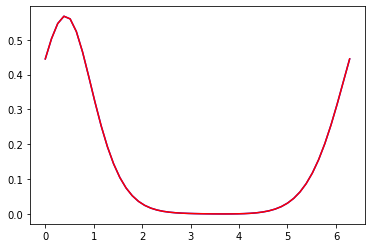

In [76]:
plt.figure()
plt.plot(nus,rhss,color='blue')
plt.plot(nus,rhss2,color='red')
plt.show(block=False)

In [68]:
tmp.args

(0.529000000000000,
 0.13225*cos(nu)**2,
 0.529*cos(nu),
 0.535331905781585/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1),
 0.133832976445396*cos(nu)**2/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1),
 0.535331905781585*cos(nu)/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1),
 -0.535331905781585*exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu)))/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1),
 -0.133832976445396*exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu)))*cos(nu)**2/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1),
 -0.535331905781585*exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu)))*cos(nu)/(exp(2*acos(0.433012701892219*sin(nu) + 0.75*cos(nu))) + 1))